# Day 1, Part C: Parking a Car with RL

## Learning goals
- How to train a reinforcement learning model
- Basic understanding of simulation environments used in RL research
- Introductory technical understanding of the reinforcement learning cycle
- 

## Definitions
- **Simulation environment**: Notice that this is not the same as the python/conda environment.  The simulation environment is the simulated world where the reinforcement learning takes place.  It provides opportunities for an agent to learn and explore, and ideally provides challenges that aid in efficient learning.
- **Agent (aka actor)**: An entity in the simulation environment that performs actions.  The agent could be a person, a robot, a car, a thermostat, and so on.
- **State variable**: An observed variable in the simulation environment.  They can be coordinates of objects or entities, an amount of fuel in a tank, air temperature, wind speed, etc.
- **Action variable**: An action that the agent can perform.  Examples: step forward, increase velocity to 552.5 knots, push object left with force of 212.3 N, etc.
- **Reward**: A value given to the agent for doing something considered to be 'good'.  Reward is commonly assigned at each time step and cumulated during a learning episode.
- **Episode**: A learning event consisting of multiple steps in which the agent can explore.  It starts with the unmodified environment and continues until the goal is achieved or something prevents further progress, such as a robot getting stuck in a hole.  Multiple episodes are typically run in loops until the model is fully trained.

![Reinforcement Learning Cycle](./images/Reinforcement-learning-diagram-01.png)

## Parking Environment

Here's another RL challenge that will take several hours to run.  Try running this overnight.

**TODO: Can we use multiple environments for this example?**

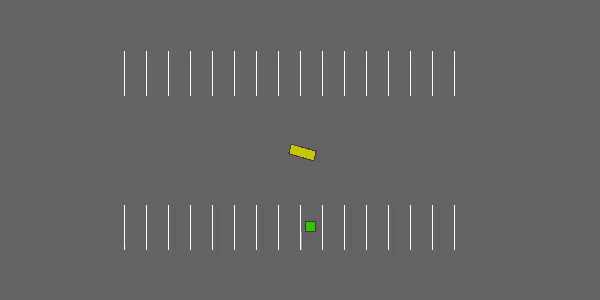

In [14]:
ipd.Image("images/parking-env.gif")

In [15]:
import highway_env
import numpy as np

from stable_baselines3 import HerReplayBuffer, SAC, DDPG, TD3
from stable_baselines3.common.noise import NormalActionNoise

env = gym.make("parking-v0")

# Create 4 artificial transitions per real transition
n_sampled_goal = 4

# SAC hyperparams:
model = SAC(
    "MultiInputPolicy",
    env,
    replay_buffer_class=HerReplayBuffer,
    replay_buffer_kwargs=dict(
      n_sampled_goal=n_sampled_goal,
      goal_selection_strategy="future",
      # IMPORTANT: because the env is not wrapped with a TimeLimit wrapper
      # we have to manually specify the max number of steps per episode
      max_episode_length=100,
      online_sampling=True,
    ),
    verbose=1,
    buffer_size=int(1e6),
    learning_rate=1e-3,
    gamma=0.95,
    batch_size=256,
    policy_kwargs=dict(net_arch=[256, 256, 256]),
)

model.learn(int(2e5))
model.save("her_sac_highway")

# Load saved model
# Because it needs access to `env.compute_reward()`
# HER must be loaded with the env
model = SAC.load("her_sac_highway", env=env)

obs = env.reset()

# Evaluate the agent
episode_reward = 0
for _ in range(100):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    episode_reward += reward
    if done or info.get("is_success", False):
        print("Reward:", episode_reward, "Success?", info.get("is_success", False))
        episode_reward = 0.0
        obs = env.reset()


Remember that the rendered model (image window) can be closed by restarting the kernel or shutting down the notebook